In [45]:
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:
#Reading the dataset into a dataframe object

In [47]:
cropDF=pd.read_csv('D:\Code Course For Assignments\Python-Module\Datasets\cropproduction.csv')

In [48]:
#Checking first five rows of the dataset

In [49]:
cropDF.head()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607,NaN
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737,NaN
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340,NaN
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000,NaN
4,4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815,NaN


In [50]:
#Basic Stats Check

In [51]:
cropDF.describe()

,index,TIME,Value,Flag Codes
count,20566.000000,20566.000000,2.056600e+04,0.0
mean,10282.500000,2007.591170,1.249281e+04,NaN
std,5937.037154,10.369489,5.960529e+04,NaN
min,0.000000,1970.000000,0.000000e+00,NaN
25%,5141.250000,1999.000000,1.961877e+00,NaN
50%,10282.500000,2008.000000,2.560970e+01,NaN
75%,15423.750000,2017.000000,1.563000e+03,NaN
max,20565.000000,2025.000000,1.146044e+06,NaN


In [52]:
#The data has 20566 rows, data has been collected from 1970 to 2025. Since its 2024, the data from 2015 onwards could have been generated using Machine Learning Models and not from actuall collection of data
#Based on that we should check the indicators for years following 2015 as the data from 1970-2015 was initially piblished in the dataset and is not part of an update.
#std for TIME is good that there is data for almost every 10 years

cropDF['INDICATOR'].describe()

count         20566
unique            1
top       CROPYIELD
freq          20566
Name: INDICATOR, dtype: object

In [53]:
#Checking data from after 2015

cropDF[(cropDF['TIME']>=2015)]

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
25,25,AUS,CROPYIELD,RICE,TONNE_HA,A,2015,9.390442,NaN
26,26,AUS,CROPYIELD,RICE,TONNE_HA,A,2016,9.459927,NaN
27,27,AUS,CROPYIELD,RICE,TONNE_HA,A,2017,9.530165,NaN
28,28,AUS,CROPYIELD,RICE,TONNE_HA,A,2018,9.600335,NaN
29,29,AUS,CROPYIELD,RICE,TONNE_HA,A,2019,9.669332,NaN
...,...,...,...,...,...,...,...,...,...
20561,20561,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2021,37010.208830,NaN
20562,20562,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2022,37069.214850,NaN
20563,20563,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2023,37143.459750,NaN
20564,20564,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2024,37013.651900,NaN


In [54]:

#Check the location of crops data from 2015 and onwards as 'OECD' in 'location' above is not one country
cropDF['LOCATION'].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA',
       'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA',
       'IND', 'IDN', 'IRN', 'KAZ', 'MYS', 'MOZ', 'NGA', 'PAK', 'PRY',
       'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA', 'THA', 'UKR',
       'URY', 'VNM', 'ZMB', 'WLD', 'SSA', 'OECD', 'BRICS', 'NOR', 'CHE',
       'EU28', 'ISR', 'HTI'], dtype=object)

In [55]:
#Lets take a look at the data from 'OECD'
cropDF[(cropDF['LOCATION']=='OECD')]

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
2907,2907,OECD,CROPYIELD,RICE,TONNE_HA,A,1994,4.701765,NaN
2908,2908,OECD,CROPYIELD,RICE,TONNE_HA,A,1995,4.453816,NaN
2909,2909,OECD,CROPYIELD,RICE,TONNE_HA,A,1996,4.790956,NaN
2910,2910,OECD,CROPYIELD,RICE,TONNE_HA,A,1997,4.759452,NaN
2911,2911,OECD,CROPYIELD,RICE,TONNE_HA,A,1998,4.583205,NaN
...,...,...,...,...,...,...,...,...,...
20561,20561,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2021,37010.208830,NaN
20562,20562,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2022,37069.214850,NaN
20563,20563,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2023,37143.459750,NaN
20564,20564,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2024,37013.651900,NaN


In [56]:
#So there are 380 Cropyield values collected for OECD as we can see from the no. of rows of above dataframe
print('No of CROPYIELD from OECD: ' + str(len(cropDF[(cropDF['LOCATION']=='OECD')])))

No of CROPYIELD from OECD: 380


In [57]:
#Crop data from location other than OECD after 2015
cropDF[(cropDF['LOCATION']!='OECD')& (cropDF['TIME']>=2015)]

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
25,25,AUS,CROPYIELD,RICE,TONNE_HA,A,2015,9.390442,NaN
26,26,AUS,CROPYIELD,RICE,TONNE_HA,A,2016,9.459927,NaN
27,27,AUS,CROPYIELD,RICE,TONNE_HA,A,2017,9.530165,NaN
28,28,AUS,CROPYIELD,RICE,TONNE_HA,A,2018,9.600335,NaN
29,29,AUS,CROPYIELD,RICE,TONNE_HA,A,2019,9.669332,NaN
...,...,...,...,...,...,...,...,...,...
20371,20371,EU28,CROPYIELD,SOYBEAN,THND_HA,A,2021,875.299646,NaN
20372,20372,EU28,CROPYIELD,SOYBEAN,THND_HA,A,2022,882.260039,NaN
20373,20373,EU28,CROPYIELD,SOYBEAN,THND_HA,A,2023,882.305973,NaN
20374,20374,EU28,CROPYIELD,SOYBEAN,THND_HA,A,2024,880.417743,NaN


In [58]:
#So there is a variety of data available from location other than the hood category of OECD
cropDF[(cropDF['LOCATION']!='OECD')& (cropDF['TIME']>=2015)].LOCATION.value_counts()

LOCATION
AUS      132
THA      132
PAK      132
PRY      132
PER      132
PHL      132
RUS      132
SAU      132
ZAF      132
SDN      132
TZA      132
UKR      132
CAN      132
URY      132
VNM      132
ZMB      132
WLD      132
SSA      132
BRICS    132
NOR      132
CHE      132
ISR      132
NGA      132
MOZ      132
MYS      132
KAZ      132
JPN      132
KOR      132
MEX      132
NZL      132
TUR      132
USA      132
DZA      132
ARG      132
BGD      132
BRA      132
CHL      132
CHN      132
COL      132
EGY      132
ETH      132
GHA      132
IND      132
IDN      132
IRN      132
HTI      132
EU28     121
Name: count, dtype: int64

In [59]:
#The data after 2015 is not only from OECD and is not negligible, there are 132 data entries for 
#each of the above countries for after 2015

In [60]:
cropDF[(cropDF['LOCATION']!='OECD')& (cropDF['TIME']>=2015)].describe()

,index,TIME,Value,Flag Codes
count,6193.000000,6193.000000,6.193000e+03,0.0
mean,10240.547069,2020.000000,1.433030e+04,NaN
std,5889.668874,3.162533,7.093714e+04,NaN
min,25.000000,2015.000000,0.000000e+00,NaN
25%,5166.000000,2017.000000,2.342513e+00,NaN
50%,10281.000000,2020.000000,3.496328e+01,NaN
75%,15333.000000,2023.000000,1.977864e+03,NaN
max,20375.000000,2025.000000,1.146044e+06,NaN


In [61]:
#there are 6193 crop yield data for non OECD countries for after 2015 

In [62]:
#Now we can clean the data
cropDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20566 entries, 0 to 20565
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       20566 non-null  int64  
 1   LOCATION    20566 non-null  object 
 2   INDICATOR   20566 non-null  object 
 3   SUBJECT     20566 non-null  object 
 4   MEASURE     20566 non-null  object 
 5   FREQUENCY   20566 non-null  object 
 6   TIME        20566 non-null  int64  
 7   Value       20566 non-null  float64
 8   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.4+ MB


In [63]:
#Good that we do not have any non-null values but notice that FLAG only has Nan values.
#Also the INDICATOR has the same value for all the data so we can drop these coloumns
#we only need one index column

cropDF=cropDF.drop(['INDICATOR','FREQUENCY','Flag Codes', 'index'], axis=1)

In [64]:
cropDF.dropna()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,RICE,TONNE_HA,1990,8.314607
1,AUS,RICE,TONNE_HA,1991,8.394737
2,AUS,RICE,TONNE_HA,1992,8.094340
3,AUS,RICE,TONNE_HA,1993,8.336000
4,AUS,RICE,TONNE_HA,1994,8.537815
...,...,...,...,...,...
20561,OECD,SOYBEAN,THND_HA,2021,37010.208830
20562,OECD,SOYBEAN,THND_HA,2022,37069.214850
20563,OECD,SOYBEAN,THND_HA,2023,37143.459750
20564,OECD,SOYBEAN,THND_HA,2024,37013.651900


In [65]:
#Check if we have any values as 0 instead of a number
np.any(cropDF['Value'][0:len(cropDF['Value'])]==0)

True

In [66]:
#How many have 0 values?
cropDF[(cropDF['Value']==0.000000)]

,LOCATION,SUBJECT,MEASURE,TIME,Value
72,CAN,RICE,TONNE_HA,1990,0.0
73,CAN,RICE,TONNE_HA,1991,0.0
74,CAN,RICE,TONNE_HA,1992,0.0
75,CAN,RICE,TONNE_HA,1993,0.0
76,CAN,RICE,TONNE_HA,1994,0.0
...,...,...,...,...,...
18021,NZL,SOYBEAN,THND_HA,2021,0.0
18022,NZL,SOYBEAN,THND_HA,2022,0.0
18023,NZL,SOYBEAN,THND_HA,2023,0.0
18024,NZL,SOYBEAN,THND_HA,2024,0.0


In [21]:
zeroValCropData=len(newCropDF[(newCropDF['Value']==0.000000)])
print(f"From data of {len(newCropDF)}, {zeroValCropData} are of Value Zero")

From data of 20566, 609 are of Value Zero


In [22]:
#Dropping all the rows with zero value for crop yield

In [68]:
cropDF = cropDF.loc[(cropDF != 0).all(axis=1)]

In [69]:
cropDF

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,RICE,TONNE_HA,1990,8.314607
1,AUS,RICE,TONNE_HA,1991,8.394737
2,AUS,RICE,TONNE_HA,1992,8.094340
3,AUS,RICE,TONNE_HA,1993,8.336000
4,AUS,RICE,TONNE_HA,1994,8.537815
...,...,...,...,...,...
20561,OECD,SOYBEAN,THND_HA,2021,37010.208830
20562,OECD,SOYBEAN,THND_HA,2022,37069.214850
20563,OECD,SOYBEAN,THND_HA,2023,37143.459750
20564,OECD,SOYBEAN,THND_HA,2024,37013.651900


In [70]:
cropDF.tail()

,LOCATION,SUBJECT,MEASURE,TIME,Value
20561,OECD,SOYBEAN,THND_HA,2021,37010.20883
20562,OECD,SOYBEAN,THND_HA,2022,37069.21485
20563,OECD,SOYBEAN,THND_HA,2023,37143.45975
20564,OECD,SOYBEAN,THND_HA,2024,37013.65190
20565,OECD,SOYBEAN,THND_HA,2025,37041.40158


In [73]:
#All subjects
cropDF['SUBJECT'].unique().tolist()

['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN']

In [74]:
# All measures
cropDF['MEASURE'].unique().tolist()

['TONNE_HA', 'THND_TONNE', 'THND_HA']

In [33]:
#The data for crop yield has been collected as tonnes per hactare. As you can see from above
#TONNE_HA is the value of one tonne per hactare which when multiplied by THND_HA gives the 
#total crop yield in THND_TONNE

In [75]:
# Measures for each subject
pd.crosstab(cropDF.SUBJECT, cropDF.MEASURE)

MEASURE,THND_HA,THND_TONNE,TONNE_HA
SUBJECT,,,
MAIZE,1719,1716,1716
RICE,1575,1572,1572
SOYBEAN,1641,1697,1610
WHEAT,1713,1713,1713


In [76]:
locations=cropDF['LOCATION'].unique().tolist()
print(locations)

['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA', 'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA', 'IND', 'IDN', 'IRN', 'KAZ', 'MYS', 'MOZ', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA', 'THA', 'UKR', 'URY', 'VNM', 'ZMB', 'WLD', 'SSA', 'OECD', 'BRICS', 'NOR', 'CHE', 'EU28', 'ISR', 'HTI']


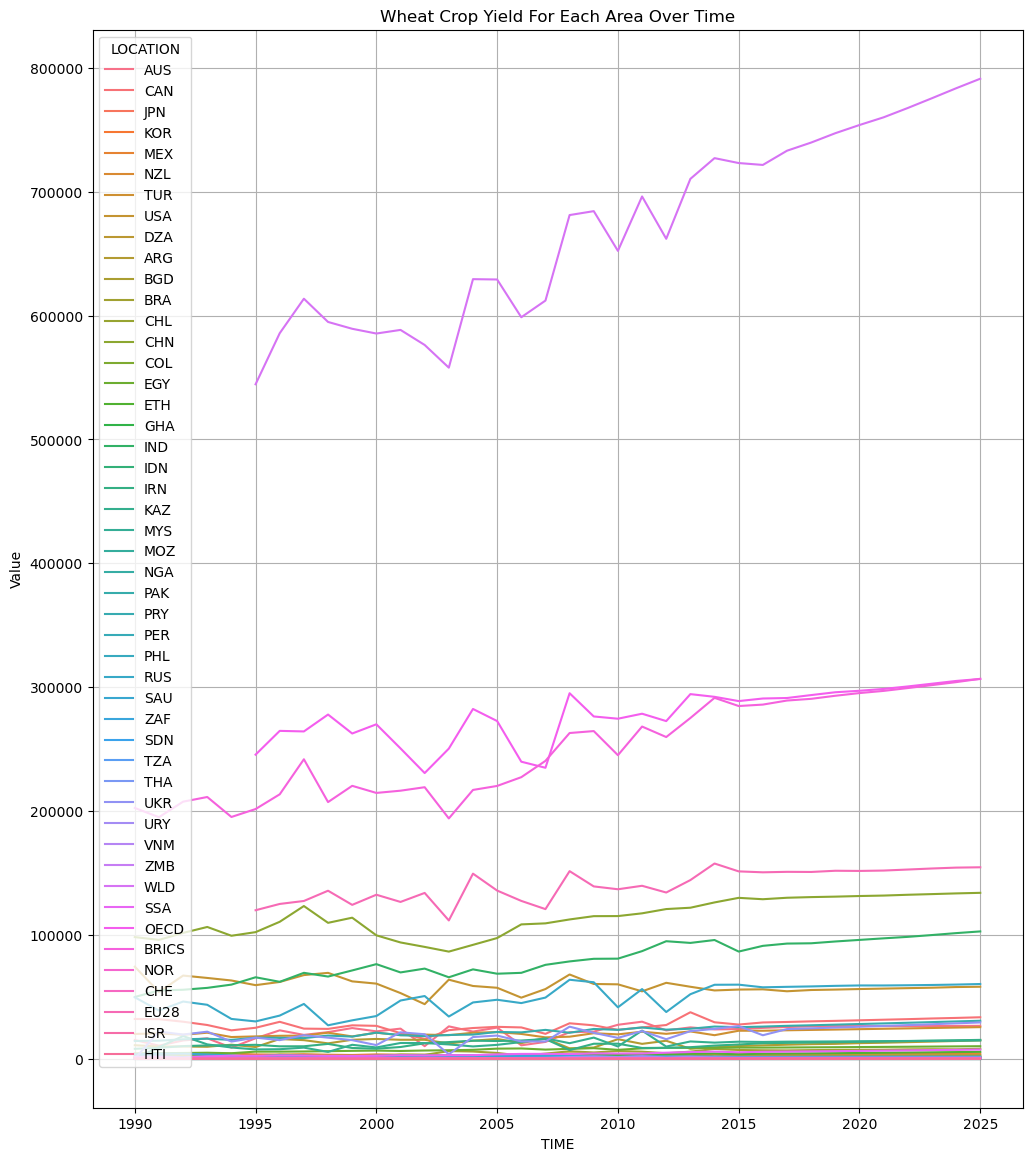

In [81]:
# Show the cropyield of Wheat for each country over time 
wheatcrop=cropDF[(cropDF['SUBJECT']=='WHEAT')&(cropDF['MEASURE']=='THND_TONNE')]
plt.figure(figsize=(12,14))
sns.lineplot(data=wheatcrop, x='TIME', y='Value', hue='LOCATION', hue_order=locations)
plt.title('Wheat Crop Yield For Each Area Over Time')
plt.grid()
plt.show()

In [80]:
#As you can see from above graph tha after 2015 we have a straight line for each country
#suggesting that regression model was used to predict the crop yield, therefore the data
#after 2015 does not seem to be reliable and cannot be used for analysis or for any
#machine learning prediction model so we should drop the data after 2015

1713


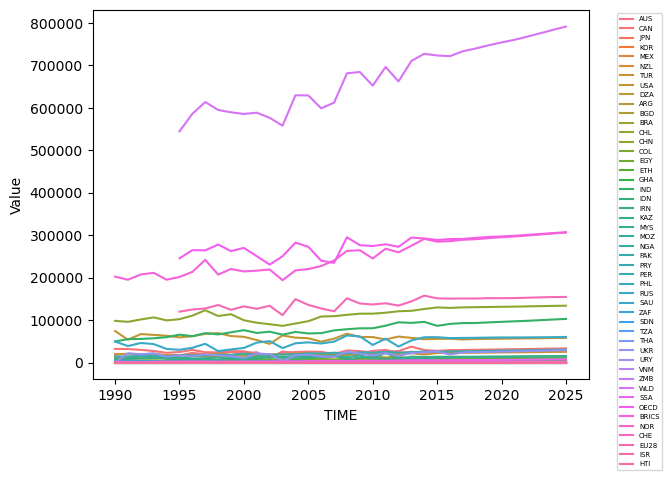

In [82]:
#Show as subplots
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
print(len(wheatcrop))
#plt.figure(figsize=(12,6))
sns.lineplot(data=wheatcrop, x='TIME', y='Value', 
             hue='LOCATION', hue_order=locations)
# Adjust legend position and orientation
sns.color_palette("dark")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)

# Show the plot
plt.show()

In [84]:
tempdf=cropDF.drop(cropDF[(cropDF['TIME']>2015)].index)
tempdf.describe()

,TIME,Value
count,14377.000000,1.437700e+04
mean,2002.581206,1.146402e+04
std,7.503586,5.344044e+04
min,1970.000000,2.170000e-06
25%,1996.000000,2.001000e+00
50%,2003.000000,3.510000e+01
75%,2009.000000,1.513900e+03
max,2015.000000,1.031399e+06


In [87]:
#Calculating the average production of WHEAT by each AREA
#and creating a new dataframe with area and average value of yield as coloumns

count=0.0
MeanValueOverYears=[]
locations=[]

#Wheat Dataframe with mean values
Wheatdf = pd.DataFrame(
  [i,tempdf[(tempdf['SUBJECT']=='WHEAT')&(tempdf['LOCATION']==i)&(tempdf['MEASURE']=='THND_TONNE')].Value.mean()] for i in tempdf['LOCATION'].unique()
)
Wheatdf.columns=['AREA','MEAN_WHEAT']

#Maize Dataframe with mean values
Maizedf=pd.DataFrame(
  [i,tempdf[(tempdf['SUBJECT']=='MAIZE')&(tempdf['LOCATION']==i)&(tempdf['MEASURE']=='THND_TONNE')].Value.mean()] for i in tempdf['LOCATION'].unique()
)

Maizedf.columns=['AREA','MEAN_MAIZE']

#Rice Dataframe with mean values
Ricedf=pd.DataFrame(
  [i,tempdf[(tempdf['SUBJECT']=='RICE')&(tempdf['LOCATION']==i)&(tempdf['MEASURE']=='THND_TONNE')].Value.mean()] for i in tempdf['LOCATION'].unique()
)
Ricedf.columns=['AREA','MEAN_RICE']

#we can merge the dataframe to create a new dataframe for Area and their mean contributions
#to crop yields

MeanYielddf=Wheatdf.merge(Maizedf,on=['AREA'])
MeanYielddf=MeanYielddf.merge(Ricedf,on=['AREA'])

MeanYielddf

#delete oldDF will do that later

,AREA,MEAN_WHEAT,MEAN_MAIZE,MEAN_RICE
0,AUS,20045.099611,350.153089,811.321006
1,CAN,26237.669121,9319.236265,NaN
2,JPN,735.788462,0.268814,8334.914725
3,KOR,12.432682,79.039500,4849.235231
4,MEX,3485.127978,19871.648306,209.045890
5,NZL,324.946907,192.941757,NaN
6,TUR,19782.384615,3279.307692,303.207692
7,USA,60029.598462,267498.975331,6179.276364
8,DZA,2076.884615,0.154642,0.700000
9,ARG,12505.518846,17331.000000,719.615385


In [88]:
#Check for top countries for wheat production to create better readable plot
MeanYielddf.sort_values(by=['MEAN_WHEAT'],ascending=False)

,AREA,MEAN_WHEAT,MEAN_MAIZE,MEAN_RICE
39,WLD,630639.430319,735698.731573,427290.362677
41,OECD,267579.488995,376284.786186,22490.865379
42,BRICS,230669.615962,216012.040885,226415.213169
45,EU28,134501.610057,60324.721014,1656.692753
13,CHN,107600.150000,141950.879846,129442.324923
18,IND,72338.153846,14796.934615,89042.854462
7,USA,60029.598462,267498.975331,6179.276364
29,RUS,44753.187385,3934.703846,463.392066
1,CAN,26237.669121,9319.236265,NaN
0,AUS,20045.099611,350.153089,811.321006


In [ ]:
#Notice that first four locations are WLD which stands for WORLD
#BRICS stands for Brazil Russia India China South Africa
#EU28 has lots of countries in it and so does OECD
#So crop yield data from these locations could dublicate data and hence will not be used.

In [115]:
#Checking no of countries for plot division without first four location

print(len(MeanYielddf)-4)

44


In [90]:
#there are 44 countries in total so we can create 4 plots of 11 countries each for a clear view

MeanYielddf.sort_values(by=['MEAN_WHEAT'],ascending=False)[4:]

,AREA,MEAN_WHEAT,MEAN_MAIZE,MEAN_RICE
13,CHN,107600.150000,141950.879846,129442.324923
18,IND,72338.153846,14796.934615,89042.854462
7,USA,60029.598462,267498.975331,6179.276364
29,RUS,44753.187385,3934.703846,463.392066
1,CAN,26237.669121,9319.236265,NaN
0,AUS,20045.099611,350.153089,811.321006
25,PAK,19957.723077,2567.169231,4993.962519
6,TUR,19782.384615,3279.307692,303.207692
35,UKR,17477.807831,9016.307865,61.082319
9,ARG,12505.518846,17331.000000,719.615385


In [91]:
#China, India, USA, Russia, Canada, Australia, Pakistan, Turkey and Ukraine
#seem to be the largest producers for wheat

In [119]:
# Filter the DataFrame for wheat production
df_wheat = tempdf[(tempdf['SUBJECT'] == 'WHEAT')&(tempdf['MEASURE']=='THND_TONNE')]

# Group by location and sum over time
grouped = df_wheat.groupby('LOCATION')['Value'].sum().sort_values(ascending=False)


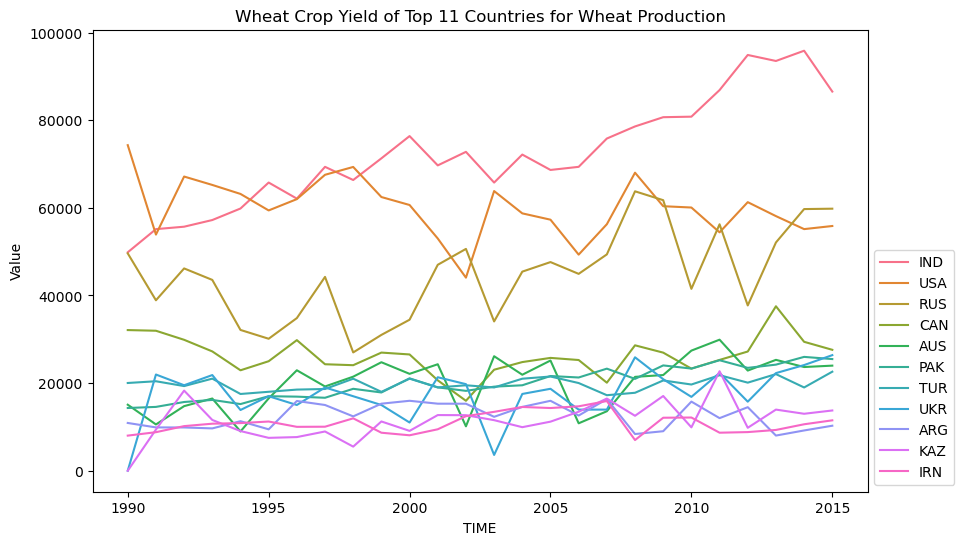

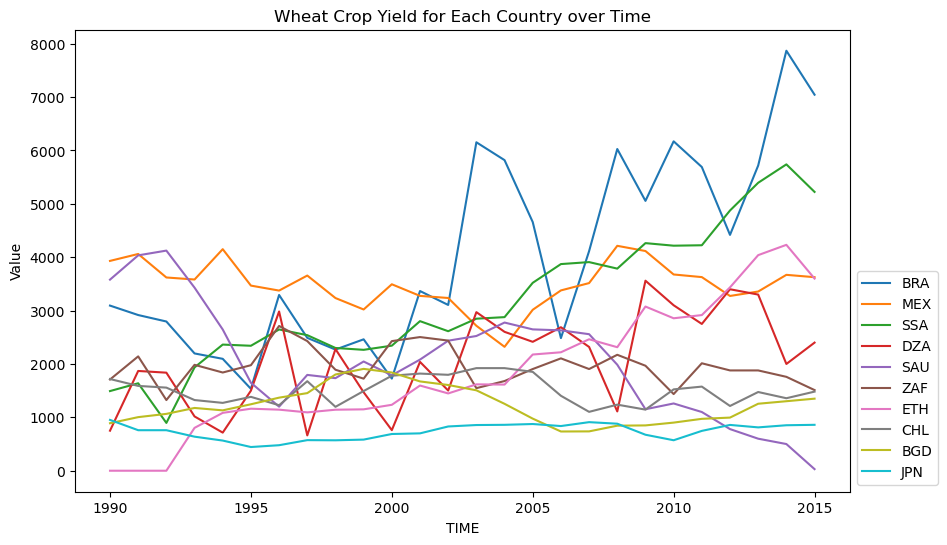

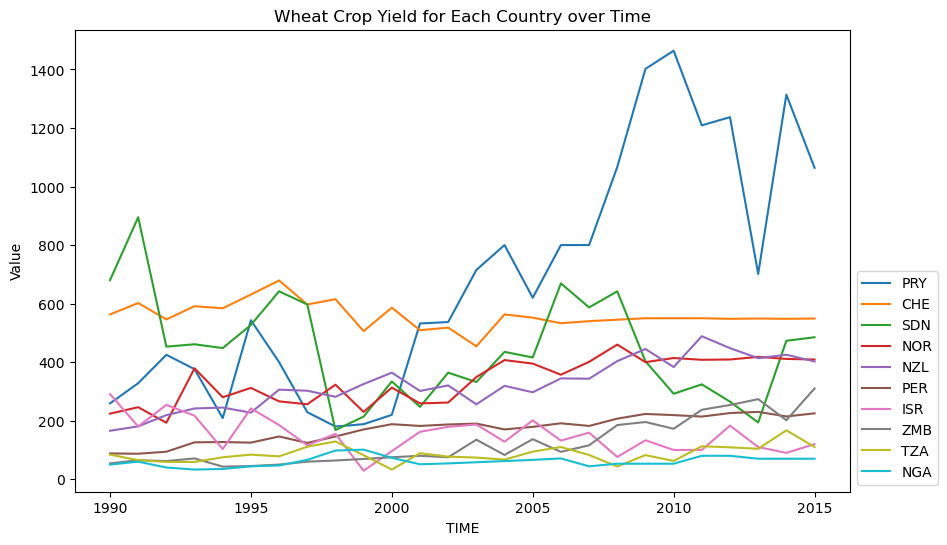

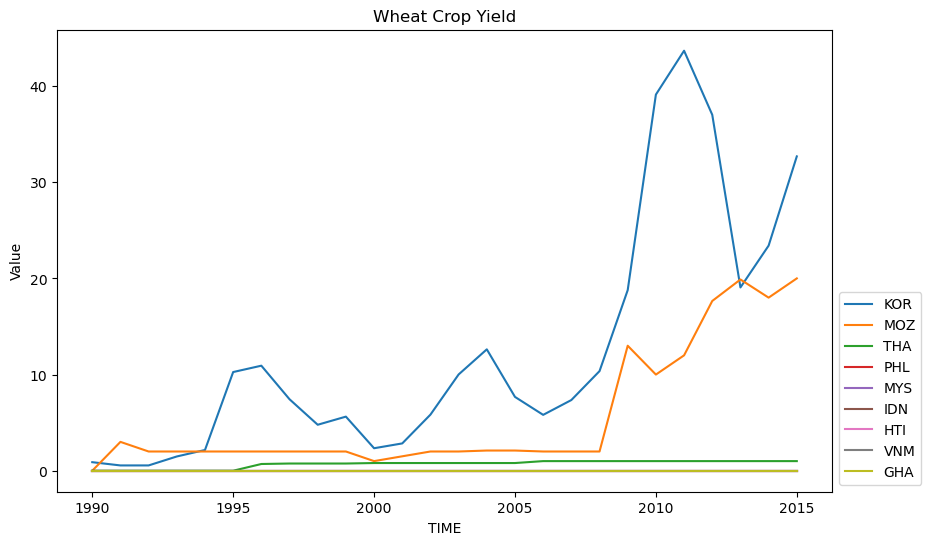

In [121]:
#Plot Top 11 Countries for Wheat Production

top_11 = grouped[5:16]
second_11 = grouped[17:27]
third_11 = grouped[28:38]
rest = grouped[39:]

#Creating function to create a line plot

def plot_Wheat(countries,title):
    
    country_data=pd.DataFrame()
    
    for country in countries.index:
        country_data = pd.concat([country_data, df_wheat[df_wheat['LOCATION'] == country]])
        
    plt.figure(figsize=(10,6))
    sns.lineplot(data=country_data,x='TIME',y='Value',hue='LOCATION',hue_order=country_data['LOCATION'].unique())
    plt.legend(bbox_to_anchor=(1, 0), loc='lower left', fontsize=10)
    plt.title(title)
    plt.show()  

plot_Wheat(top_11,'Wheat Crop Yield of Top 11 Countries for Wheat Production')
plot_Wheat(second_11, 'Wheat Crop Yield for Each Country over Time')
plot_Wheat(third_11, 'Wheat Crop Yield for Each Country over Time')
plot_Wheat(rest,'Wheat Crop Yield for Each Country over Time')
